In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [102]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [103]:
df.shape

(10841, 13)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [105]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [106]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [107]:
df['Reviews'].str.isnumeric().sum() #there is 10841 rows

np.int64(10840)

In [108]:
#Going to get error

df['Reviews'] = df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [109]:
df[~df['Reviews'].str.isnumeric()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [110]:
mask = df["Reviews"].str.contains("M", na=False)
df.loc[mask, "Reviews"] = df.loc[mask, "Reviews"].str.replace("M", "", regex=False).astype(float) * 1_000_000


In [ ]:
#df_copy = df.copy()
#df_copy.drop(df_copy.index[10472])

In [111]:

df['Reviews'] = df['Reviews'].astype(int)
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                           3000000
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [112]:

df['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [113]:
df['Size'] = df["Size"].replace('Varies with device', np.nan)
df['Size'] = df["Size"].str.replace('k', "000")
df['Size'] = df["Size"].str.replace('M', "000000")




df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [114]:
df['Installs'].unique()
df['Installs'] = df['Installs'].replace('Free', 0)
df['Installs'] = df['Installs'].replace(np.nan, 0)
df['Installs'] = df['Installs'].str.split("+").str[0].str.replace(",","").astype(float)

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000000,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000000,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [115]:
df['Installs'].isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [116]:
df['Last Updated'].unique()
df['Last Updated'].isnull().sum()

df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Day'] = df['Last Updated'].dt.day
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000.0,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000000,5000000.0,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000.0,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000000,100000.0,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0


In [117]:
# Step 1: Split the genres by ";" into a list
df['Genres'] = df['Genres'].str.split(';')

# Step 2: Use explode to create a row for each genre
#df = df.explode('Genres').reset_index(drop=True)

df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000.0,Free,0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000000,5000000.0,Free,0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000.0,Free,0,Teen,[Art & Design],2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000000,100000.0,Free,0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0


#Data Analysis

In [124]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,0,Everyone,[Business],2018-02-26,Varies with device,4.0.3 and up,26.0,2.0,2018.0
236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,0,Everyone,[Business],2018-07-31,Varies with device,Varies with device,31.0,7.0,2018.0
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0,Everyone,[Business],2018-07-24,2.19.0.204537701,4.4 and up,24.0,7.0,2018.0
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000000,10000000.0,Free,0,Everyone,[Business],2018-07-20,4.1.28165.0716,4.0 and up,20.0,7.0,2018.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,0,Everyone,[Business],2018-07-16,4.3.0.508,4.4 and up,16.0,7.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4000000,100000.0,Free,0,Mature 17+,[Dating],2016-02-25,2.2,4.0 and up,25.0,2.0,2016.0
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0000000,1000000.0,Free,0,Everyone,[Communication],2018-07-06,5.2,5.0 and up,6.0,7.0,2018.0
10730,FP Notebook,MEDICAL,4.5,410,60000000,50000.0,Free,0,Everyone,[Medical],2018-03-24,2.1.0.372,4.4 and up,24.0,3.0,2018.0
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000000,1000000.0,Free,0,Everyone,[Shopping],2018-07-30,3.9,4.4 and up,30.0,7.0,2018.0


In [123]:
df.drop_duplicates(subset=['App'], keep = 'first')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000.0,Free,0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000000,5000000.0,Free,0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000.0,Free,0,Teen,[Art & Design],2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000000,100000.0,Free,0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000.0,Free,0,Everyone,[Education],2017-07-25,1.48,4.1 and up,25.0,7.0,2017.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6000000,100.0,Free,0,Everyone,[Education],2018-07-06,1.0,4.1 and up,6.0,7.0,2018.0
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5000000,1000.0,Free,0,Everyone,[Medical],2017-01-20,1.0,2.2 and up,20.0,1.0,2017.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0,Mature 17+,[Books & Reference],2015-01-19,Varies with device,Varies with device,19.0,1.0,2015.0


In [125]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

df.info()

We have 7 numerical features : ['Rating', 'Reviews', 'Installs', 'Last Updated', 'Day', 'Month', 'Year']

We have 9 categorical features : ['App', 'Category', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            9146 non-null   object        
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    1084

In [130]:
#proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)

 #print(df['App'].value_counts(normalize=True)*100)

App
ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: proportion, Length: 9660, dtype: float64
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903
COMMUNICATION   

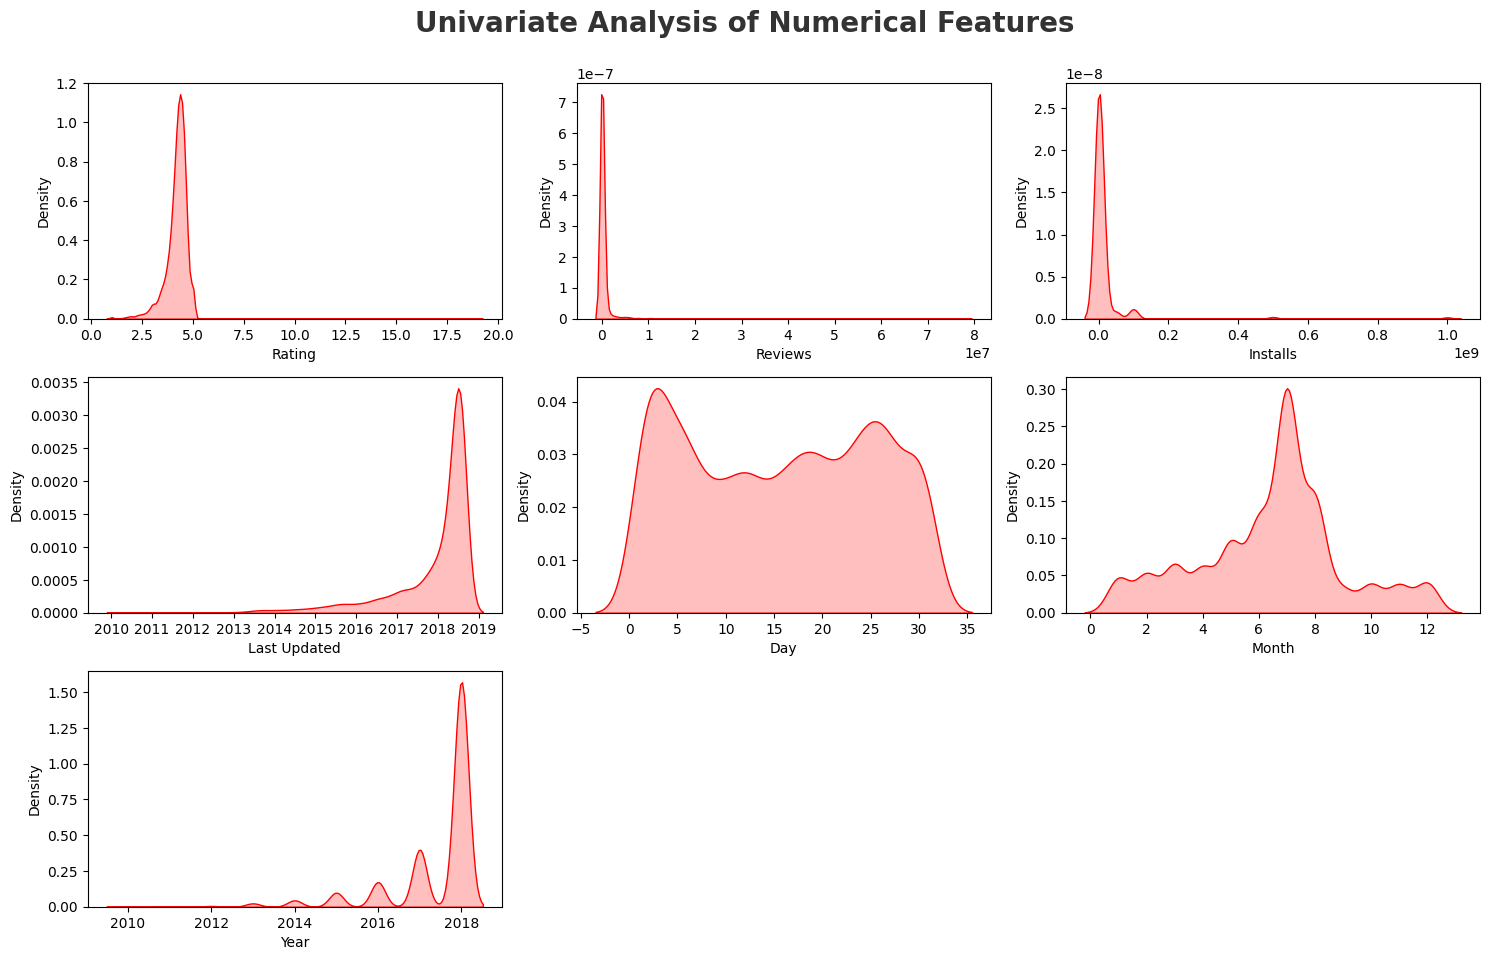

In [132]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Axes: ylabel='count'>

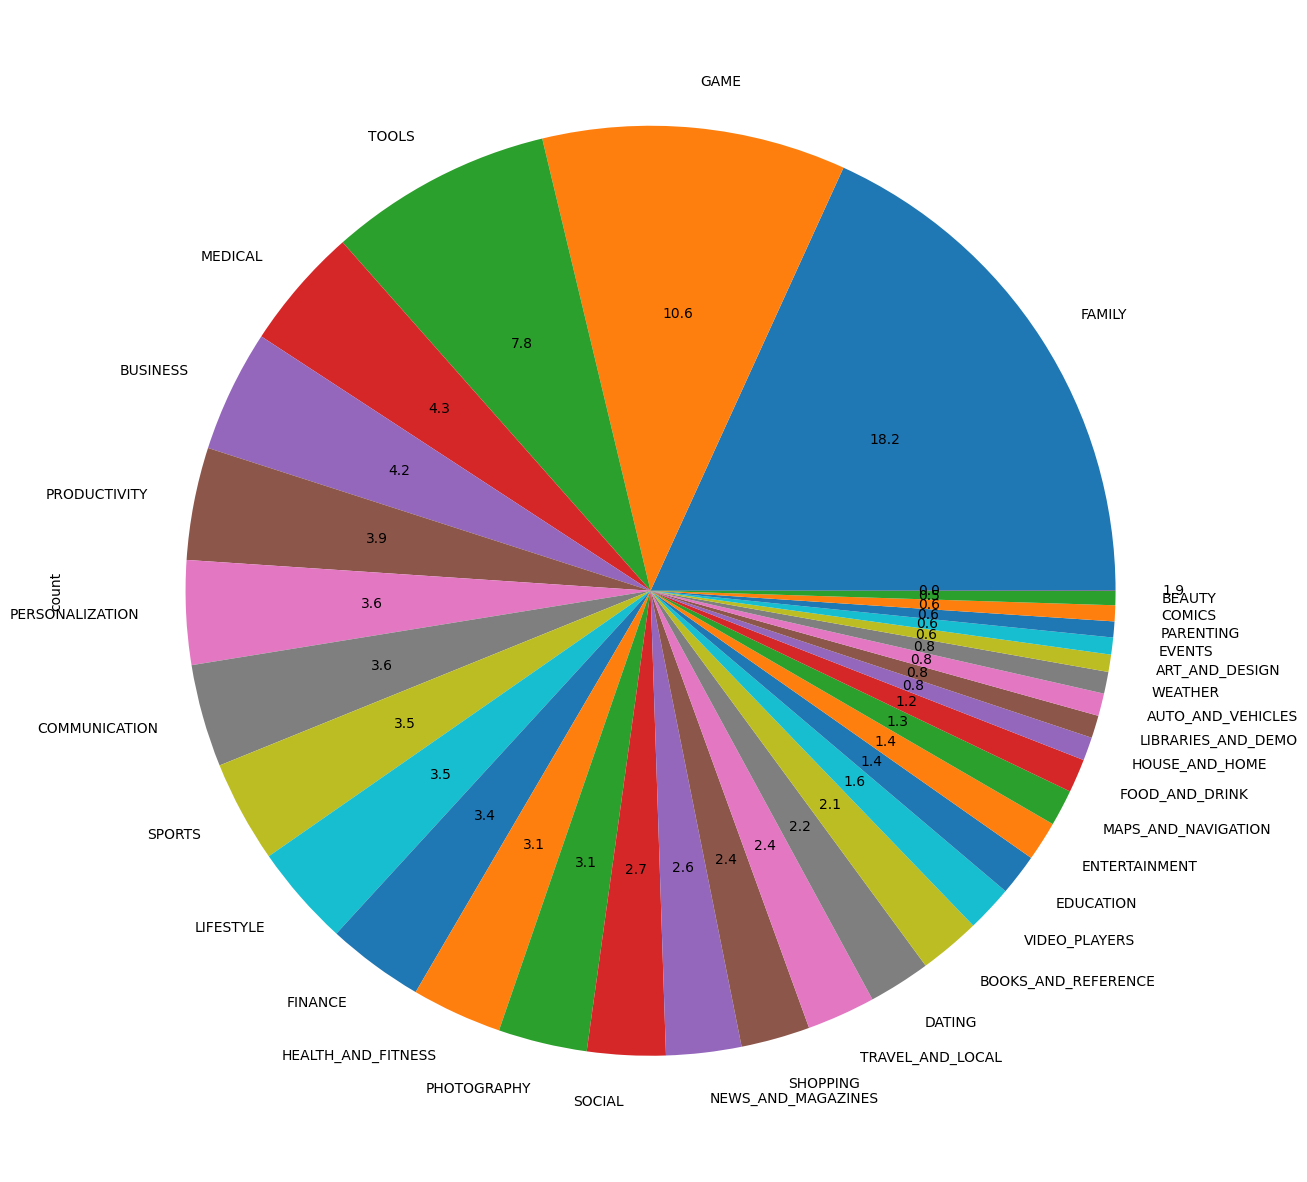

In [134]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')

In [135]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000.0,Free,0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000000,5000000.0,Free,0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000.0,Free,0,Teen,[Art & Design],2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000000,100000.0,Free,0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0
